In [ ]:
"""
    File : scatterFitnessSpatialFeatures.ipynb
    Plot : scatter plot of the average fitness of a sample of tumour voxels at the centre versus that of randomly sampled tumour voxels
    Input : SourceData_Fig2fg.xlsx
"""

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path_to_all_source_data = "../Source data for figures"

In [15]:
def read_and_plot(sheet_names):
    def config_font_size(figsize):
        params = {'legend.fontsize': 6,
                  'figure.figsize': figsize,
                 'axes.labelsize': 8,
                 'axes.titlesize': 8,
                 'xtick.labelsize':6,
                 'ytick.labelsize':6,
                 'pdf.fonttype':42}
        plt.rcParams.update(params)

    colors = ["red", "blue"]
    sns.set_palette(sns.color_palette(colors))

    for sheet_name in excelfile.sheet_names:
        data = pd.read_excel(
            excelfile, 
            sheet_name=sheet_name
        )

        print(sheet_name)

        fig = plt.figure(dpi=300)
        ax = fig.add_axes([0.2,0.2,0.75,0.75])

        config_font_size(figsize = (3.5,3))

        ax.axhline(y = 1, ls = '--', c = 'k', lw = 0.5)
        ax.axhline(y = 0.25, ls = '--', c = 'k', lw = 0.5)
        ax.axvline(x = 1, ls = '--', c = 'k', lw = 0.5)
        ax.axvline(x = 0.25, ls = '--', c = 'k', lw = 0.5)
        ax.plot(
            [0.25,1], [0.25,1], c = 'grey', lw=0.5, zorder=1
        )

        snsplt = sns.scatterplot(
            data=data,
            x='Fitness.Random',
            y='Fitness.Centre',
            hue='Growth.Pattern',
            size='Driver.Acquisition.Rate',
            size_order=['pdriver=1e-3','pdriver=6e-4','pdriver=2e-4'],
            style='Necrosis',
            markers=['o', '^'],
            ax=ax,
            alpha=0.3,
            zorder=3
        )

        ax.legend(loc = 2)
        ax.set_xlabel('Mean fitness of tumour voxels in random samples')
        ax.set_ylabel('Mean fitness of tumour voxels\n sampled at centre')
        
        plt.show()
        plt.close()


# Figure 2f & Figure 2g

In [4]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Figure_2",
    "SourceData_Fig2fg.xlsx"
)

In [5]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataFig2f', 'SourceDataFig2g']

SourceDataFig2f


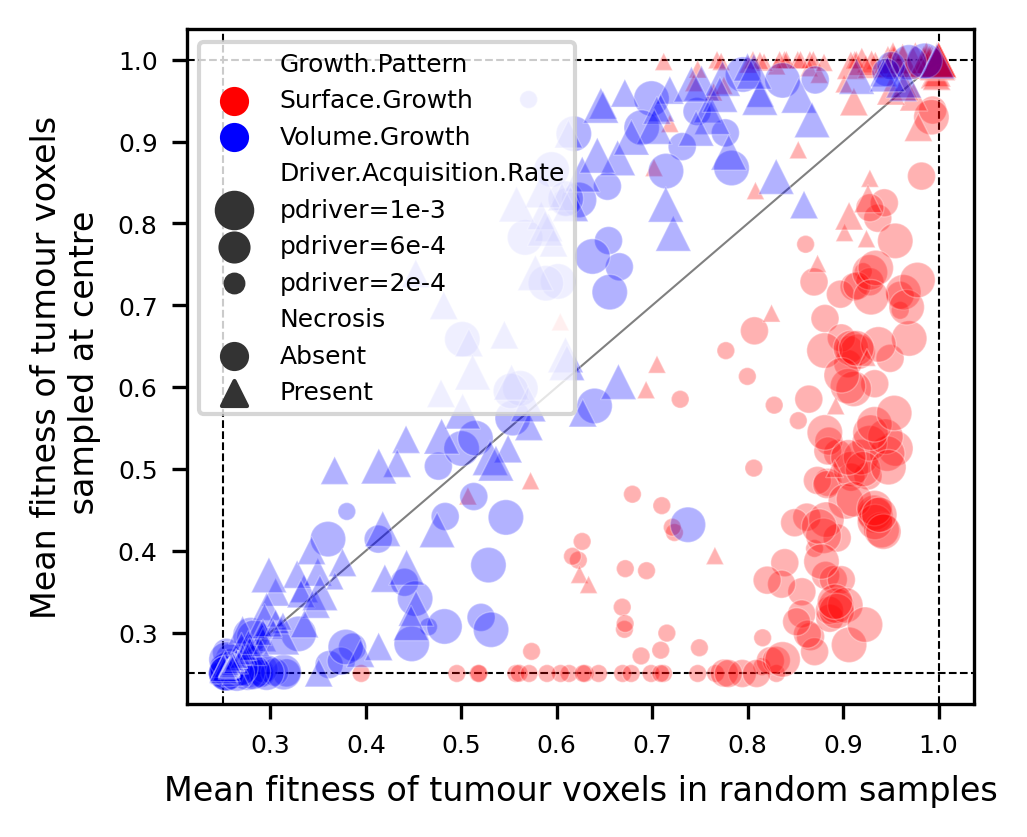

SourceDataFig2g


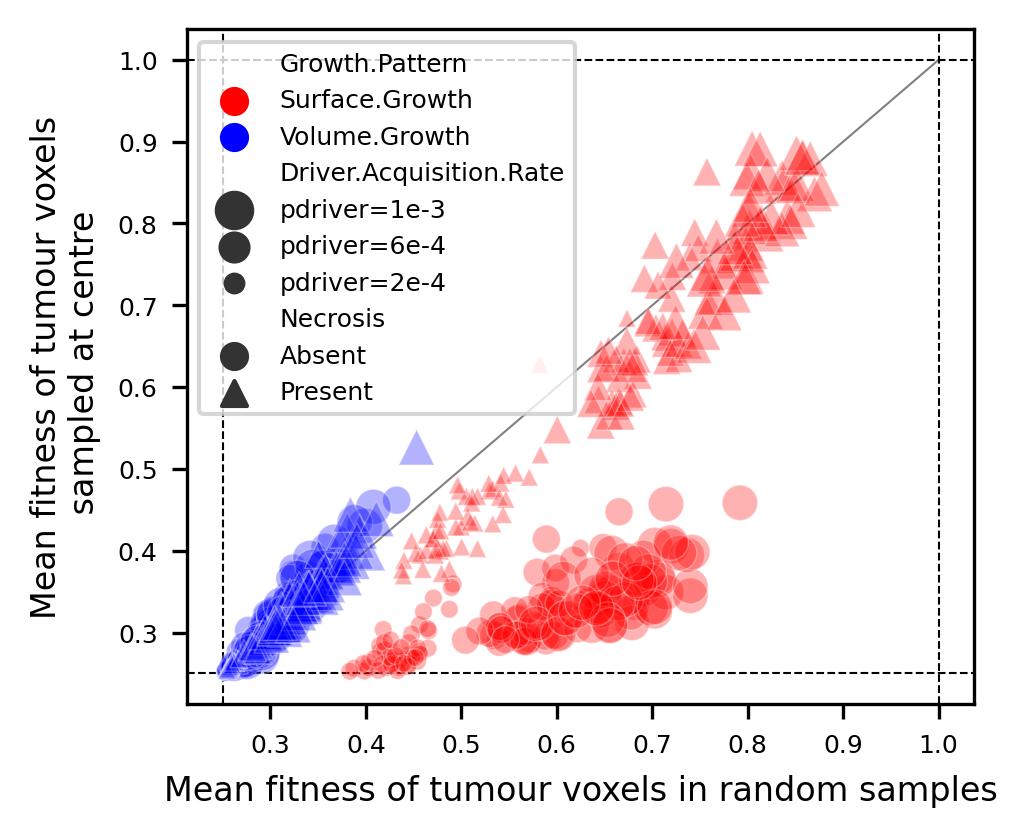

In [16]:
read_and_plot(excelfile.sheet_names)